[ 15927.625       15927.66666667  15927.70833333  15927.75        15927.79166667
  15927.83333333  15927.875       15927.91666667  15927.95833333  15928.        ]
[-0.         -0.0155255  -0.02933751 -0.04400627 -0.05867502 -0.07334378
 -0.08801253 -0.10268129 -0.11735004 -0.13972954]
[-0.         -0.0155255  -0.02933751 -0.04400627 -0.05867502 -0.07334378
 -0.08801253 -0.10268129 -0.11735004 -0.13972954]
[-0.         -0.02688172 -0.05376344 -0.08064516 -0.10752688 -0.13440861
 -0.16129032 -0.18817204 -0.21505377 -0.24193548]
[-0.         -0.00889243 -0.01778487 -0.0266773  -0.03556973 -0.04446217
 -0.0533546  -0.06224703 -0.07113947 -0.0800319 ]


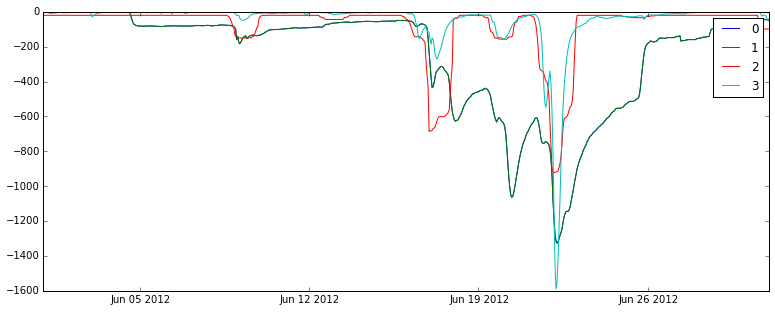

In [28]:
%matplotlib inline
import netCDF4
import matplotlib.pyplot as plt
import datetime
import romspy

t = datetime.datetime

ncfile3 = 'F:/okada/Dropbox/Data/ob500_river_2012_fennelP-3.nc'
ncfile5 = 'F:/okada/Dropbox/Data/ob500_river_2012_fennelP-5.nc'

nc = netCDF4.Dataset(ncfile5, 'r')
time = nc.variables['river_time_hourly']
print time[:10]
time = netCDF4.num2date(time[:], romspy.JST_days)
q = nc.variables['river_transport'][:,:]
yodo = q[:,6]
yamato = q[:,11]

def plot():
    fig, ax = plt.subplots(1,1, figsize=[13,5])
    for i in range(34):
        ax.plot(time, q[:,i])
    ax.set_xlim(t(2012,1,1,0),t(2012,2,1,0))
    ax.set_ylim(-20, 0)

fig, ax = plt.subplots(1,1, figsize=[13,5])
for i in range(4):
    print q[:10,i]
    ax.plot(time, q[:,i], label=str(i))
ax.set_xlim(t(2012,6,1,0),t(2012,7,1,0))
#ax.set_ylim(-20, 0)
ax.legend()

(-20, 0)

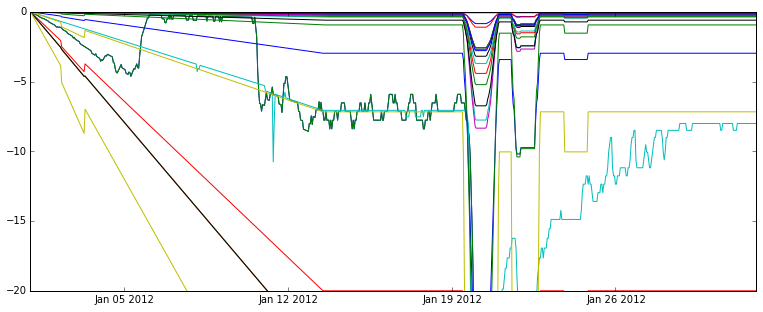

(734716.0, 734747.0)

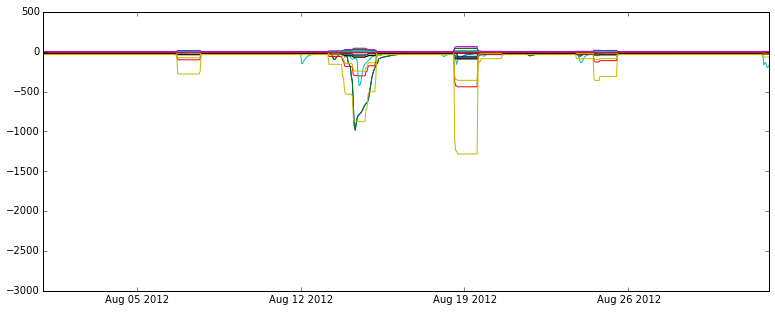

In [4]:
fig, ax = plt.subplots(1,1, figsize=[13,5])
for i in range(34):
    ax.plot(time, q[:,i])
#ax.plot([t(2012,6,20,3,16,0),t(2012,6,20,3,16,0)], [-200,0], 'k-')
ax.set_xlim(t(2012,8,1,0),t(2012,9,1,0))
#ax.set_ylim(-200,0)

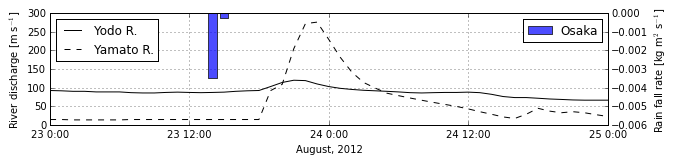

In [14]:
fig, ax = plt.subplots(1,1,figsize=[10,2])
ax2 = ax.twinx()

ax.plot(time-60, -yodo*2, 'k-', label='Yodo R.')
ax.plot(time-60, -yamato*2, 'k--', label='Yamato R.')
ax.set_xlim(23,25)
ax.set_ylim(0,300)
ax.set_xticklabels(['23 0:00','23 12:00','24 0:00','24 12:00','25 0:00'])
ax.set_xlabel('August, 2012')
ax.set_ylabel("River discharge [m s$^{-1}$]")
ax.grid()
ax.legend(loc=2)

ax2.bar(rtime-61, -rain, align='center', width=0.03, alpha=0.7, label='Osaka')
ax2.set_ylim(-0.006, 0)
ax2.set_ylabel('Rain fall rate [kg m$^{2}$ s$^{-1}$]')
ax2.legend(loc=1)

In [8]:
plt.savefig('check_river_rain.png', bbox_inches='tight')

In [12]:
plt.show(fig)